In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from emissions.trainer import Trainer
from emissions.data import load_data, clean_data
from sklearn.metrics import plot_confusion_matrix

In [3]:
pollution_quantity = {}

# 2019 - Baseline model

In [4]:
from emissions.impsearch import ImpSearch
imp = ImpSearch()
imp.load_data()

----------------start loading data----------------
Data loaded: 187503 records
----------------start cleaning data----------------

Records in input data: 187503

Share of Pass and Fail before cleaning:
Fail: 7%
Pass: 93%

Unique vehicles in Fail: 10813
Unique vehicles in Pass: 84908

Records with missing GVWR: 8125

Records after droping rows where GVWR is < 1000 or missing: 179373

Records after keeping only the earliest test within a month for each vehicle: 165732

Records where AFTER_COVID is True: 21325

Records where ODOMETER = 0: 796

Records after droping rows where ODOMETER is missing: 164855

Records after droping rows where MILE_YEAR > 40,000: 163891

Records in output data:163891

Share of Pass and Fail after cleaning:
Fail: 7%
Pass: 93%

Unique vehicles in Fail: 10194
Unique vehicles in Pass: 78573
['VEHICLE_TYPE' 'MODEL_YEAR' 'VEHICLE_AGE' 'MILE_YEAR' 'GVWR'
 'ENGINE_SIZE' 'TRANS_TYPE' 'TEST_TYPE' 'RESULT' 'MAKE'
 'ENGINE_WEIGHT_RATIO' 'SPORT' 'TEST_SDATE' 'AFTER_COVID']


In [5]:
imp.cols = ['VEHICLE_AGE', 'MILE_YEAR', 'MAKE']
imp.cols

['VEHICLE_AGE', 'MILE_YEAR', 'MAKE']


max_depth: 3
           train    val   test
accuracy   0.577  0.572  0.721
recall     0.686  0.687  0.305
precision  0.113  0.111  0.082

By the time 2019-03-27, 
                    - 401 vehicles were off the road in reality
                    - 467 vehicles could have been off the road using model max_depth = 3

By the time 2019-04-10, 
                    - 460 vehicles were off the road in reality
                    - 532 vehicles could have been off the road using model max_depth = 3

max_depth: 4
           train    val   test
accuracy   0.493  0.491  0.475
recall     0.716  0.714  0.641
precision  0.099  0.098  0.080

By the time 2019-07-07, 
                    - 861 vehicles were off the road in reality
                    - 981 vehicles could have been off the road using model max_depth = 4

By the time 2019-04-10, 
                    - 460 vehicles were off the road in reality
                    - 559 vehicles could have been off the road using model max_depth = 4

max

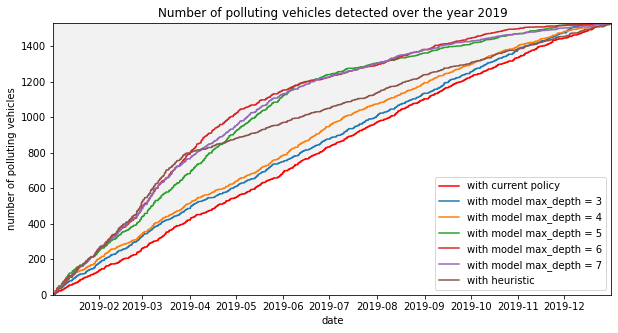

6            10726795
7            11049391
5            11410315
heuristic    12798512
4            15034294
3            15800547
dtype: int64

Saved implementation_analysis_2019_best_6.csv in data folder


In [6]:
imp.implement(2019, max_depth=np.arange(3, 8))

In [11]:
pollution_quantity['2019_baseline'] = [6, 10726795]

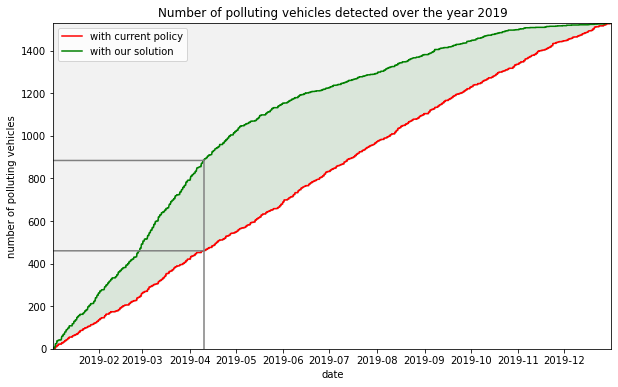

In [7]:
imp.plot_clean()

# 2019 - Decision Tree


In [8]:
imp.cols = ['VEHICLE_AGE', 'MILE_YEAR', 'MAKE', 'MODEL_YEAR', 'ENGINE_WEIGHT_RATIO']


max_depth: 3
           train    val   test
accuracy   0.553  0.550  0.395
recall     0.759  0.765  0.845
precision  0.114  0.115  0.088

By the time 2019-08-14, 
                    - 1026 vehicles were off the road in reality
                    - 1293 vehicles could have been off the road using model max_depth = 3

By the time 2019-04-10, 
                    - 460 vehicles were off the road in reality
                    - 713 vehicles could have been off the road using model max_depth = 3

max_depth: 4
           train    val   test
accuracy   0.549  0.533  0.715
recall     0.718  0.723  0.597
precision  0.110  0.106  0.137

By the time 2019-04-11, 
                    - 466 vehicles were off the road in reality
                    - 914 vehicles could have been off the road using model max_depth = 4

By the time 2019-04-10, 
                    - 460 vehicles were off the road in reality
                    - 906 vehicles could have been off the road using model max_depth = 4

m

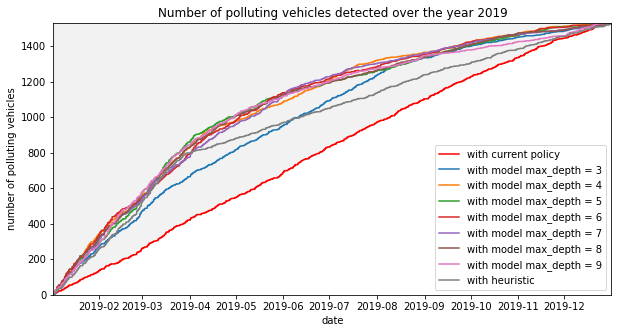

4            10675857
6            10743551
5            10814464
8            10836114
7            10876561
9            10947718
3            12485762
heuristic    12798512
dtype: int64

Saved implementation_analysis_2019_best_4.csv in data folder


In [9]:
imp.implement(2019, max_depth=np.arange(3, 10))

In [12]:
pollution_quantity['2019_DT'] = [4, 10675857]

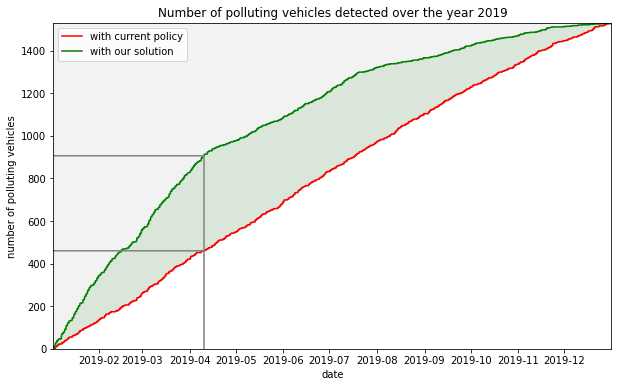

In [10]:
imp.plot_clean()

# 2019 - Random Forest


max_depth: 6
           train    val   test
accuracy   0.615  0.613  0.710
recall     0.757  0.747  0.632
precision  0.129  0.129  0.140

By the time 2019-04-16, 
                    - 484 vehicles were off the road in reality
                    - 968 vehicles could have been off the road using model max_depth = 6

By the time 2019-04-10, 
                    - 460 vehicles were off the road in reality
                    - 942 vehicles could have been off the road using model max_depth = 6

max_depth: 7
           train    val   test
accuracy   0.628  0.625  0.719
recall     0.756  0.742  0.628
precision  0.133  0.131  0.144

By the time 2019-04-11, 
                    - 466 vehicles were off the road in reality
                    - 961 vehicles could have been off the road using model max_depth = 7

By the time 2019-04-10, 
                    - 460 vehicles were off the road in reality
                    - 952 vehicles could have been off the road using model max_depth = 7

max

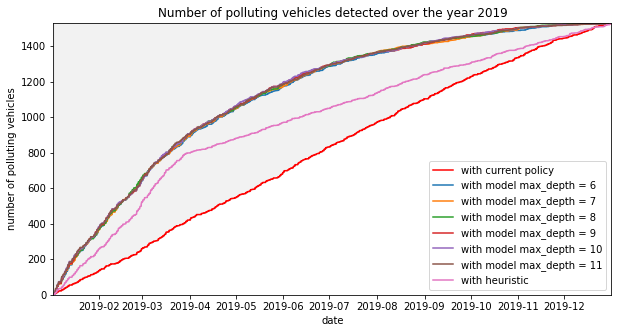

10            9360899
9             9397362
8             9405257
11            9407712
7             9499547
6             9569803
heuristic    12798512
dtype: int64

Saved implementation_analysis_2019_best_10.csv in data folder
CPU times: user 4min 20s, sys: 304 ms, total: 4min 20s
Wall time: 16min 35s


In [13]:
%%time
imp.implement(2019, n_estimators=[100], max_depth=np.arange(6, 12, 1))

In [15]:
pollution_quantity['2019_RF'] = [10, 9360899]

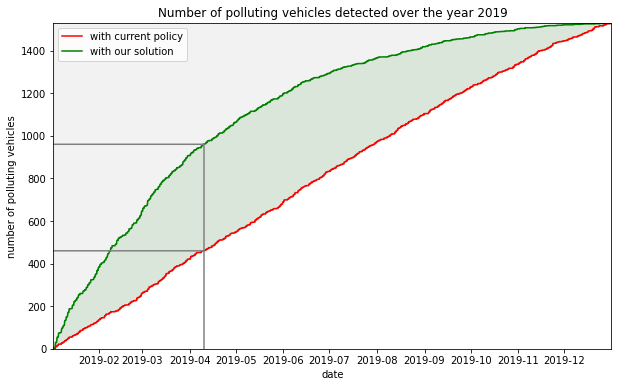

In [14]:
imp.plot_clean()

# Summary

In [16]:
t = pd.read_csv('../data/implementation_analysis_2019_best_6.csv').sort_values('TEST_SDATE')
t.set_index('TEST_SDATE', inplace=True)
t['n_fails_left'] = t.n_fails.max() - t.n_fails
pollution_quantity['current_policy'] = ['-', t.n_fails_left.sum()]

In [17]:
tmp = pd.DataFrame.from_dict(pollution_quantity, orient='index')
tmp.columns = ['max_depth', 'pollution_quantity']
tmp['pollution_reduction'] = tmp.loc['current_policy', 'pollution_quantity'] - tmp.pollution_quantity
tmp.sort_values('pollution_reduction', ascending=False)

,max_depth,pollution_quantity,pollution_reduction
2019_RF,10,9360899,7463288
2019_DT,4,10675857,6148330
2019_baseline,6,10726795,6097392
current_policy,-,16824187,0
